# **Extracción, transformación y carga (ETL)**

En este cuaderno de trabajo, nuestro propósito es ejecutar el proceso de extracción, transformación y carga (ETL) de los datos de accidentes viales en la Ciudad de Buenos Aires, para poder presentarlos en un formato apropiado para su análisis y visualización posterior. Este procedimiento nos permitirá acceder a la información sobre los accidentes y las víctimas de manera estructurada y clara, además de abordar cualquier problema potencial de calidad y coherencia de los datos.


1. Convertir los archivos **`xlsx`** a csv las sheets **Hechos** y **Victimas**
2. Unir los dataframes Hechos y Victimas en uno solo llamado Homicidios seleccionando solo las columnas que se utilizaran que son **17**.
3. Contar y visualizar con un gráfico de barras la cantidad de valores `NaN` y `SD` en el dataframes **Homicidios**.
4. Clasificar las variables por continuas, categóricas y mixtas.
5. Realizar las tranformaciones y tratamiento de datos según la clasificación de las variables.

#### Clasificación de las variables del dataframe **Homicidios** cualitativas o categóricas

| Tipo de Variable | Variables |
|------------------|-----------|
| Categóricas      | TIPO_DE_CALLE, PARTICIPANTES, VICTIMA, ACUSADO, ROL, SEXO, Dirección Normalizada, COMUNA |
| Continuas        | ID, N_VICTIMAS, FECHA, HORA, pos x, pos y, EDAD, FECHA_FALLECIMIENTO |
| Mixtas           | Cruce|

---
Comprendiendo los tipos de variables del dataframe **Homicidios**:
Como se mostro en la tabla tenemos variables categoricas recordando la definición de variables categóricas: Las **variables categóricas** que son variables que representan características y se pueden dividir en categorías o grupos discretos y no numéricos. Estas categorías pueden ser nominales o ordinales.

Variables Categóricas Nominales: Las variables categóricas nominales representan categorías que no tienen un orden intrínseco o significado numérico inherente.
En otras palabras, las categorías son simplemente etiquetas o nombres sin un orden específico.
En nuestro caso se identificaron las siguientes variables categóricas nominales  en el conjunto de datos **"Homicidios"**:

| Variable Categórica Nominal | Descripción |
|------------------------------|-------------|
| TIPO_DE_CALLE                | Describe el tipo de arteria donde ocurrió el hecho. Las categorías (calle, avenida, autopista, etc.) no tienen un orden específico. |
| PARTICIPANTES                | Describe la conjunción de víctima y acusado en el siniestro. Las categorías (múltiple, peatón, moto, etc.) no tienen un orden intrínseco. |
| VICTIMA                      | Describe el tipo de vehículo ocupado por la víctima. Las categorías (peatón, moto, auto, etc.) no tienen un orden específico. |
| ACUSADO                      | Describe el tipo de vehículo ocupado por el acusado. Al igual que en VICTIMA, las categorías no tienen un orden específico. |
| SEXO                         | Describe el género de la víctima. Las categorías (masculino, femenino) no tienen un orden intrínseco. |
| Dirección Normalizada | Describe la dirección normalizada del lugar donde ocurrió el siniestro. Las categorías son identificaciones de lugares y no tienen un orden intrínseco. |
| ROL                       | Describe la posición relativa al vehículo que presentaba la víctima en el momento del siniestro |

Variables Categóricas Ordinales: Las variables categóricas ordinales representan categorías que tienen un orden intrínseco o jerarquía.
A diferencia de las variables nominales, las categorías ordinales tienen un significado relativo y pueden clasificarse en función de su importancia o magnitud.
En nuestro caso la variable COMUNA se clasifica como una variable categórica ordinal. Aunque las comuna de la ciudad se enumeran del 1 al 15, existe un orden implícito que indica una jerarquía geográfica dentro de la ciudad. En este caso, las comunas están numeradas de manera secuencial y se puede establecer un orden entre ellas.

| Variable Categórica ordinal | Descripción |
|---------------------|-------------|
| COMUNA              | Comuna de la ciudad donde ocurrió el siniestro. Esta variable es categórica y representa la comuna específica de la ciudad donde tuvo lugar el incidente vial. |


#### Clasificación de las variables del dataframe **Homicidios** cuantitativa  o continuas

**Variables Cuantitativas**:

Variables Discretas: Son aquellas que representan valores contables y generalmente están asociadas con conteos o recuentos de eventos. Ejemplos incluyen número de víctimas, edad en años, etc. En el conjunto de datos "Homicidios", las variables discretas serían N_VICTIMAS y EDAD.

| Variable Cuantitativa Discreta | Descripción |
|--------------------------------|-------------|
| N_VICTIMAS                     | Cantidad de víctimas en el siniestro. Esta variable representa el recuento de personas involucradas en un incidente específico. Es un valor entero que cuenta el número de víctimas afectadas en el siniestro vial. |
| EDAD                           | Edad de la víctima en el momento del siniestro. Esta variable es un número entero que indica la cantidad de años que tiene la persona en el momento del incidente. Representa una medida discreta de la edad de las víctimas involucradas en los siniestros viales. |


**Variables Continuas:** Son aquellas que pueden tomar un número infinito de valores dentro de un rango específico y generalmente están asociadas con mediciones precisas. Ejemplos incluyen coordenadas geográficas (pos x y pos y), fechas, horas, etc. En el conjunto de datos "Homicidios", las variables continuas serían ID, FECHA, HORA, pos x, pos y, y FECHA_FALLECIMIENTO.

| Variable Cuantitativa Continua | Descripción |
|--------------------------------|-------------|
| ID                             | Identificador único del siniestro. Este valor numérico o alfanumérico se utiliza para distinguir cada siniestro de manera única en el conjunto de datos. |
| FECHA                          | Fecha en que ocurrió el siniestro. Se expresa en formato 'dd/mm/aaaa' y representa el día en que ocurrió el incidente vial. |
| HORA                           | Hora en que ocurrió el siniestro. Se expresa en formato de 24 horas ('HH:mm') y representa la hora exacta del incidente. |
| pos x                          | Coordenada de longitud donde ocurrió el siniestro. Este valor numérico indica la posición geográfica del siniestro en el eje horizontal. |
| pos y                          | Coordenada de latitud donde ocurrió el siniestro. Este valor numérico indica la posición geográfica del siniestro en el eje vertical. |
| FECHA_FALLECIMIENTO            | Fecha de fallecimiento de la víctima, si corresponde. Se expresa en formato 'dd/mm/aaaa' y representa la fecha en que falleció la víctima del siniestro vial. |

**Variables Mixtas**:

Las variables mixtas contienen tanto datos categóricos como numéricos y a menudo requieren un procesamiento especial para su análisis.
En el conjunto de datos "Homicidios", la variable mixta es
Cruce: Nombre del cruce en caso de que sea una encrucijada.

| Variable Mixta | Descripción |
|----------------|-------------|
| Cruce          | Nombre del cruce en caso de que sea una encrucijada. Esta variable contiene datos categóricos que representan el nombre del cruce donde ocurrió el siniestro. |

Teniendo esta información podemos empezar con los siguientes pasos primero usaremos como guía el siguiente **Roadmap** y mapa mental de **Tipo de variables** para hacer la limpieza de datos, transformaciónes necesarias y asegurar la calidad de los datos tomando decisiones informadas basado en las clasificaciones hechas posteriormente permite un enfoque más preciso.

Se hizo lectura de los diccionarios de datos y del informe  [Bases de Víctimas Fatales en Siniestros Viales. Notas para su uso](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/NOTAS_HOMICIDIOS_SINIESTRO_VIAL.pdf)

Empezaremos haciendo la uníon de los dataframes Hechos y Victimas y crear uno solo con las columnas que se utilizaran para los proximos pasos llamado **Homicidios**

In [1]:
# import pygwalker as pyg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
hechos = pd.read_csv('/content/drive/MyDrive/Homicidios/Hechos.csv')

In [3]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [4]:
victimas= pd.read_csv('/content/drive/MyDrive/Homicidios/Victimas.csv')

In [5]:
victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [6]:
# Columnas relevantes
hechos_columns = ['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE', 'Cruce', 'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Dirección Normalizada', 'LUGAR_DEL_HECHO', 'Calle']
victimas_columns = ['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']

# Creación de subsets de los DataFrames con solo las columnas necesarias
hechos_subset = hechos[hechos_columns]
victimas_subset = victimas[victimas_columns]

# Realizamos una copia explícita del DataFrame para evitar la advertencia
victimas_subset = victimas_subset.copy()

# Renombramos la columna para que coincida con la columna 'ID' de hechos_subset
victimas_subset.rename(columns={'ID_hecho': 'ID'}, inplace=True)

# Realizamos el merge
Homicidios = pd.merge(left=hechos_subset, right=victimas_subset, on='ID', how='left')

In [7]:
Homicidios.shape

(717, 19)

In [8]:
Homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE', 'Cruce', 'COMUNA',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO',
       'Dirección Normalizada', 'LUGAR_DEL_HECHO', 'Calle', 'ROL', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [9]:
Homicidios.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
HORA                       0
TIPO_DE_CALLE              0
Cruce                    177
COMUNA                     0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
Dirección Normalizada      9
LUGAR_DEL_HECHO            0
Calle                      1
ROL                        0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO       68
dtype: int64

In [10]:
Homicidios.replace('SD', np.nan, inplace=True)
Homicidios.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
HORA                       1
TIPO_DE_CALLE              0
Cruce                    177
COMUNA                     0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   23
Dirección Normalizada      9
LUGAR_DEL_HECHO            1
Calle                      1
ROL                       11
SEXO                       6
EDAD                      53
FECHA_FALLECIMIENTO       68
dtype: int64

Observamos los valores **NaN** en las columnas del dataframe

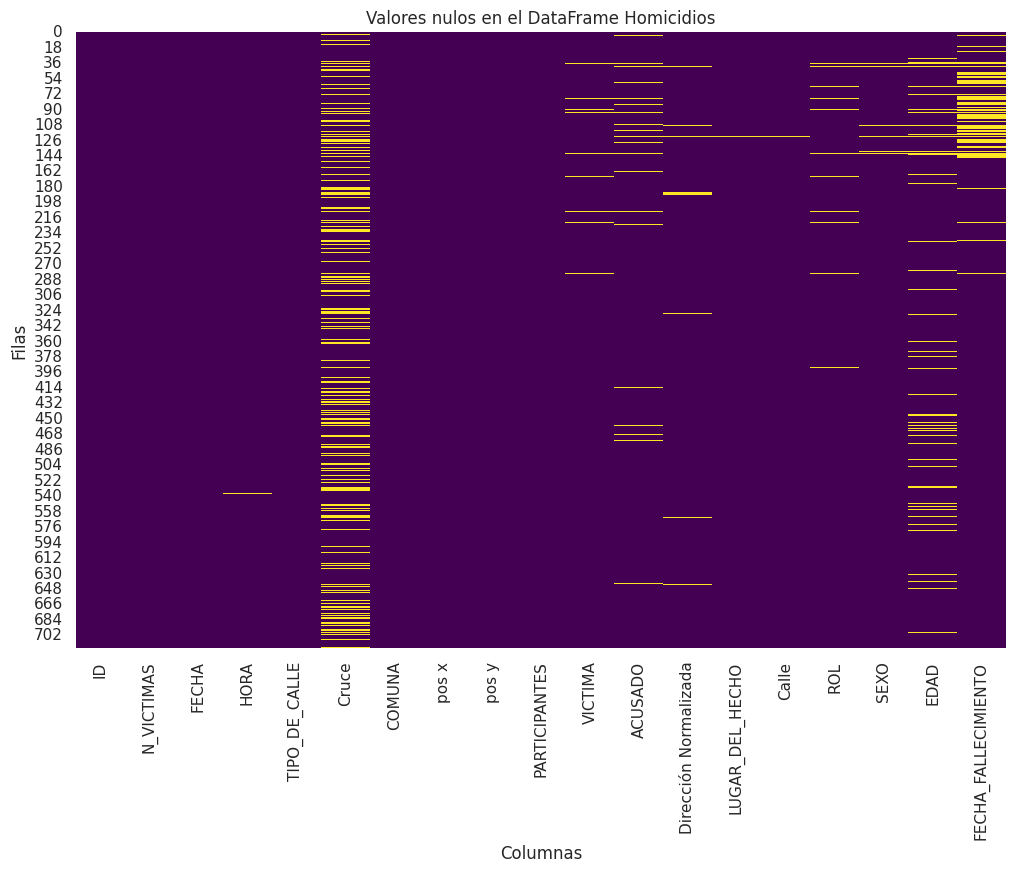

In [11]:
# Configurar el estilo y los colores
sns.set(style="whitegrid", palette="pastel")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.heatmap(Homicidios.isnull(), cbar=False, cmap='viridis')

# Añadir título y ajustes
plt.title('Valores nulos en el DataFrame Homicidios')
plt.xlabel('Columnas')
plt.ylabel('Filas')

# Mostrar el gráfico
plt.show()

### **Variable cuantitativa continua FECHA**
Creamos una nueva variable llamada **fecha_hora** para tener la hora y fecha en esta nueva variable.



In [12]:
# Convertimos las columnas 'FECHA' y 'HORA' al formato datetime
Homicidios['FECHA'] = pd.to_datetime(Homicidios['FECHA'])
Homicidios['HORA'] = pd.to_datetime(Homicidios['HORA'], format="%H:%M:%S", errors='coerce')

# En caso de valores faltantes se imputan por la moda
Homicidios['HORA'] = Homicidios['HORA'].fillna(Homicidios['HORA'].mode().iloc[0])

# Creamos una función que combina 'FECHA' y 'HORA' en 'fecha_hora'
def create_datetime(row):
    return pd.to_datetime(row['FECHA'].strftime("%Y-%m-%d") + " " + row['HORA'].strftime("%H:%M:%S"))

# Aplicamos la función a cada fila del DataFrame
Homicidios['fecha_hora'] = Homicidios.apply(create_datetime, axis=1)

# Verificamos el resultado
Homicidios[['FECHA', 'HORA', 'fecha_hora']].sample(5)

,FECHA,HORA,fecha_hora
488,2019-06-20,1900-01-01 03:00:00,2019-06-20 03:00:00
389,2018-09-12,1900-01-01 14:25:00,2018-09-12 14:25:00
350,2018-06-14,1900-01-01 01:00:00,2018-06-14 01:00:00
130,2016-12-06,1900-01-01 07:22:00,2016-12-06 07:22:00
339,2018-05-15,1900-01-01 21:15:00,2018-05-15 21:15:00


### Varibles cuantitativas continuas `(pos x, pos y)`
Identificamos los siguientes valores faltantes en las columnas `(pos x, pos y)` que tienen un  `.` en las filas con ausencia de valor. Observamos que en total **`13`** registros.


In [13]:
Homicidios[Homicidios['pos x'] == '.'].head(2)

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,fecha_hora
39,2016-0052,1,2016-04-20,1900-01-01 20:00:00,AUTOPISTA,NaN,13,.,.,MOTO-SD,MOTO,NaN,NaN,AUTOPISTA LUGONES PK 10000,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,NaN,2016-04-20 20:00:00
108,2016-0136,1,2016-10-25,1900-01-01 00:00:00,AUTOPISTA,NaN,4,.,.,MOTO-CARGAS,MOTO,CARGAS,NaN,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA BUENOS AIRES - LA PLATA,CONDUCTOR,NaN,NaN,NaN,2016-10-25 00:00:00


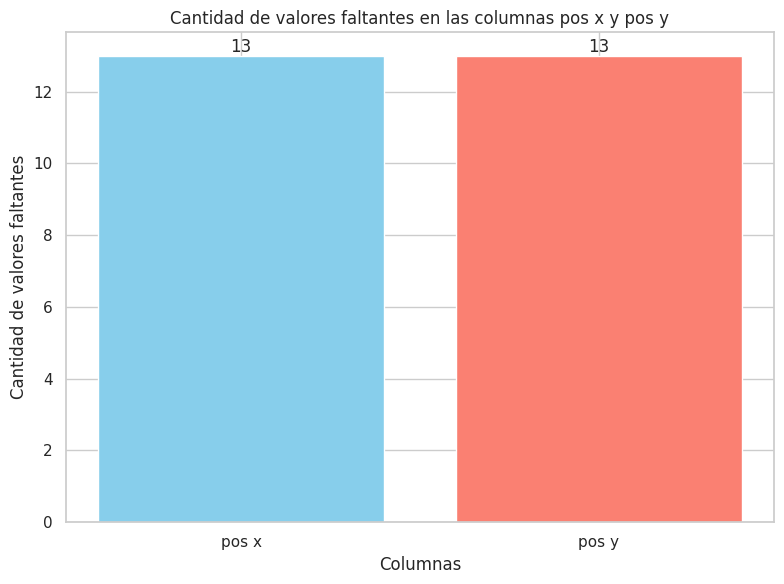

In [14]:
# Filtrar las filas donde 'pos x' y 'pos y' contienen cadenas vacías ('.')
homicidios_con_vacios = Homicidios[(Homicidios['pos x'] == '.') | (Homicidios['pos y'] == '.')]

# Contar la cantidad de filas con valores vacíos en 'pos x' y 'pos y'
cantidad_filas_vacias_pos_x = (homicidios_con_vacios['pos x'] == '.').sum()
cantidad_filas_vacias_pos_y = (homicidios_con_vacios['pos y'] == '.').sum()
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(['pos x', 'pos y'], [cantidad_filas_vacias_pos_x, cantidad_filas_vacias_pos_y], color=['skyblue', 'salmon'])

# Añadir etiquetas y título
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Cantidad de valores faltantes en las columnas pos x y pos y')

# Mostrar el valor de cada barra en la parte superior de la barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Reemplazamos los valores `"."` por `0` después imputamos esos valores teniendo en cuenta el valor que tiene asociado en la columna **comuna** y cambiamos el tipo de dato que tiene `object` a `float`.

In [15]:
# Reemplazar los valores "." por 0 en las columnas pos x y pos y
Homicidios['pos x'] = Homicidios['pos x'].replace('.', 0)
Homicidios['pos y'] = Homicidios['pos y'].replace('.', 0)

# Convertir las columnas a tipo de dato float
Homicidios['pos x'] = Homicidios['pos x'].astype(float)
Homicidios['pos y'] = Homicidios['pos y'].astype(float)

Reemplazmos los valores `0` a `NaN`

In [16]:

Homicidios['pos x'] = Homicidios['pos x'].replace(0, np.nan)
Homicidios['pos y'] = Homicidios['pos y'].replace(0, np.nan)


Hacemos un bucle que itere sobre cada fila del DataFrame y esto permitira verificar si hay otra fila con la misma **'Dirección Normalizada'** que tenga valores no **NaN** en 'pos x' o 'pos y'. Si encuentra una coincidencia, reemplaza los valores NaN en 'pos x' o 'pos y' con los valores correspondientes de la fila coincidente.

In [17]:
for index, row in Homicidios.iterrows():
    # Si pos x es NaN y Dirección Normalizada coincide con otra fila y esa fila tiene un valor no NaN en pos x
    if pd.isna(row['pos x']) and row['Dirección Normalizada'] in Homicidios.loc[(Homicidios['Dirección Normalizada'] == row['Dirección Normalizada']) & (~Homicidios['pos x'].isna()), 'Dirección Normalizada'].values:
        Homicidios.at[index, 'pos x'] = Homicidios.loc[(Homicidios['Dirección Normalizada'] == row['Dirección Normalizada']) & (~Homicidios['pos x'].isna()), 'pos x'].iloc[0]

    # Si pos y es NaN y Dirección Normalizada coincide con otra fila y esa fila tiene un valor no NaN en pos y
    if pd.isna(row['pos y']) and row['Dirección Normalizada'] in Homicidios.loc[(Homicidios['Dirección Normalizada'] == row['Dirección Normalizada']) & (~Homicidios['pos y'].isna()), 'Dirección Normalizada'].values:
        Homicidios.at[index, 'pos y'] = Homicidios.loc[(Homicidios['Dirección Normalizada'] == row['Dirección Normalizada']) & (~Homicidios['pos y'].isna()), 'pos y'].iloc[0]


In [18]:
# # Si no se cumple la condición anterior, reemplazar NaN por los valores no NaN de 'pos x' y 'pos y' con la misma COMUNA
Homicidios['pos x'] = Homicidios.groupby('COMUNA')['pos x'].transform(lambda x: x.fillna(x.mean()))
Homicidios['pos y'] = Homicidios.groupby('COMUNA')['pos y'].transform(lambda x: x.fillna(x.mean()))

In [19]:
# Reemplazar NaN por los valores no NaN de 'pos x' y 'pos y' con la misma 'TIPO_DE_CALLE'
Homicidios['pos x'] = Homicidios.groupby('TIPO_DE_CALLE')['pos x'].transform(lambda x: x.fillna(x.mean()))
Homicidios['pos y'] = Homicidios.groupby('TIPO_DE_CALLE')['pos y'].transform(lambda x: x.fillna(x.mean()))

In [20]:
Homicidios[Homicidios['pos x'].isna()]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,fecha_hora


In [21]:
indices = [39, 108, 121, 141, 182, 186, 187, 188, 266, 327, 564, 578, 642]
Homicidios.loc[indices]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,fecha_hora
39,2016-0052,1,2016-04-20,1900-01-01 20:00:00,AUTOPISTA,NaN,13,-58.454505,-34.551733,MOTO-SD,MOTO,NaN,NaN,AUTOPISTA LUGONES PK 10000,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,NaN,2016-04-20 20:00:00
108,2016-0136,1,2016-10-25,1900-01-01 00:00:00,AUTOPISTA,NaN,4,-58.394943,-34.644526,MOTO-CARGAS,MOTO,CARGAS,NaN,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA BUENOS AIRES - LA PLATA,CONDUCTOR,NaN,NaN,NaN,2016-10-25 00:00:00
121,2016-0151,1,2016-11-18,1900-01-01 20:35:00,CALLE,NaN,0,-58.434046,-34.617024,PEATON-SD,PEATON,NaN,NaN,NaN,NaN,PEATON,NaN,NaN,NaN,2016-11-18 20:35:00
141,2016-0174,1,2016-12-27,1900-01-01 00:00:00,AUTOPISTA,NaN,0,-58.436478,-34.627101,SD-SD,NaN,NaN,AUTOPISTA 25 DE MAYO,AUTOPISTA 25 DE MAYO,AUTOPISTA 25 DE MAYO,NaN,NaN,NaN,NaN,2016-12-27 00:00:00
182,2017-0042,1,2017-04-10,1900-01-01 09:00:00,GRAL PAZ,NaN,14,-58.417629,-34.580215,MOTO-CARGAS,MOTO,CARGAS,"LUGONES, LEOPOLDO AV.",AV. LEOPOLDO LUGONES PKM 6900,"LUGONES, LEOPOLDO AV.",CONDUCTOR,MASCULINO,NaN,2017-04-10,2017-04-10 09:00:00
186,2017-0050,2,2017-04-28,1900-01-01 11:08:08,AUTOPISTA,NaN,9,-58.501604,-34.651377,MOTO-CARGAS,MOTO,CARGAS,NaN,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA PERITO MORENO,CONDUCTOR,MASCULINO,46,2017-04-28,2017-04-28 11:08:08
187,2017-0050,2,2017-04-28,1900-01-01 11:08:08,AUTOPISTA,NaN,9,-58.501604,-34.651377,MOTO-CARGAS,MOTO,CARGAS,NaN,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA PERITO MORENO,PASAJERO_ACOMPAÑANTE,MASCULINO,16,2017-04-28,2017-04-28 11:08:08
188,2017-0051,1,2017-05-01,1900-01-01 03:47:47,AUTOPISTA,NaN,7,-58.455196,-34.636266,AUTO-AUTO,AUTO,AUTO,NaN,AU DELLEPIANE 2400,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,CONDUCTOR,MASCULINO,33,2017-05-01,2017-05-01 03:47:47
266,2017-0140,1,2017-11-19,1900-01-01 23:22:17,AUTOPISTA,NaN,4,-58.377146,-34.636575,MOTO-PASAJEROS,MOTO,PASAJEROS,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,CONDUCTOR,MASCULINO,24,2017-11-19,2017-11-19 23:22:17
327,2018-0039,1,2018-04-21,1900-01-01 22:15:00,AUTOPISTA,NaN,14,-58.417629,-34.580215,PEATON-AUTO,PEATON,AUTO,NaN,AUTOPISTA LUGONES KM 4.7,"LUGONES, LEOPOLDO AV.",PEATON,MASCULINO,37,2018-04-21,2018-04-21 22:15:00


Cambiamos el el nombre de las columnas `pos x`, `pos y` a **longitud** y **latitud**

In [22]:
# Cambiamos el nombre de las columnas 'pos x' y 'pos y' a 'longitud' y 'latitud'
Homicidios.rename(columns={'pos x': 'Longitud', 'pos y': 'Latitud'}, inplace=True)

### **Variable cuantitativa continua FECHA_FALLECIMIENTO**

- Antes de la imputación teniamos registrado ``68`` valores **NaN** se decidio imputar los valores faltantes por los valores de la columna **FECHA** para evitar perdidas de datos. Aun así se observo que puede tener un sesgo porque muchos de los fallecidos no murieron en la fecha que fue reportado el siniestro víal observamos casos de los que fallecieron en la misma fecha y otros unos días después observamos más a detalle con gráficos en el **EDA**.

In [23]:
# Asegúramos de que ambas columnas son de tipo datetime
Homicidios['FECHA'] = pd.to_datetime(Homicidios['FECHA'])
Homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(Homicidios['FECHA_FALLECIMIENTO'], errors='coerce')

# Crea una copia de la columna 'FECHA_FALLECIMIENTO'
Homicidios['FECHA_FALLECIMIENTO_IMPUTADA'] = Homicidios['FECHA_FALLECIMIENTO'].copy()

# Reemplaza los valores NaT en la columna 'FECHA_FALLECIMIENTO_IMPUTADA' con los valores correspondientes de la columna 'FECHA'
Homicidios['FECHA_FALLECIMIENTO_IMPUTADA'].fillna(Homicidios['FECHA'], inplace=True)

In [24]:
Homicidios.head(4)

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,...,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,fecha_hora,FECHA_FALLECIMIENTO_IMPUTADA
0,2016-0001,1,2016-01-01,1900-01-01 04:00:00,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO-AUTO,...,AUTO,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,PIEDRA BUENA AV.,CONDUCTOR,MASCULINO,19,2016-01-01,2016-01-01 04:00:00,2016-01-01
1,2016-0002,1,2016-01-02,1900-01-01 01:15:00,GRAL PAZ,DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO-PASAJEROS,...,PASAJEROS,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV.",CONDUCTOR,MASCULINO,70,2016-01-02,2016-01-02 01:15:00,2016-01-02
2,2016-0003,1,2016-01-03,1900-01-01 07:00:00,AVENIDA,NaN,1,-58.390403,-34.631894,MOTO-AUTO,...,AUTO,ENTRE RIOS AV. 2034,AV ENTRE RIOS 2034,ENTRE RIOS AV.,CONDUCTOR,MASCULINO,30,2016-01-03,2016-01-03 07:00:00,2016-01-03
3,2016-0004,1,2016-01-10,1900-01-01 00:00:00,AVENIDA,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,...,NaN,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,LARRAZABAL AV.,CONDUCTOR,MASCULINO,18,NaT,2016-01-10 00:00:00,2016-01-10


In [25]:
# Eliminar la columna 'FECHA_FALLECIMIENTO' y renombrar la columna 'FECHA_FALLECIMIENTO_IMPUTADA' a 'FECHA_FALLECIMIENTO'
Homicidios.drop('FECHA_FALLECIMIENTO', axis=1, inplace=True)
Homicidios.rename(columns={'FECHA_FALLECIMIENTO_IMPUTADA':'FECHA_FALLECIMIENTO'}, inplace=True)

In [26]:
Homicidios.head(1)

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,fecha_hora,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,1900-01-01 04:00:00,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,PIEDRA BUENA AV.,CONDUCTOR,MASCULINO,19,2016-01-01 04:00:00,2016-01-01


### **Variable cuantitativa discreta EDAD**
- Para tratar los valores `NaN` de la columna edad que son `53` registros identificados para evitar perdida de información y practicidad teniendo en cuenta que es una variable continua reemplazaremos sus valores por la mediana de la edad que es 35 y cambiaremos su tipo de dato

In [27]:
# Convertir los valores NaN a 0 en la columna EDAD
Homicidios['EDAD'] = Homicidios['EDAD'].fillna(0)
# cambiar el tipo de datos de la columna EDAD a int
Homicidios['EDAD'] = Homicidios['EDAD'].astype(int)

In [28]:
# calcular la mediana de la columna EDAD y reemplazar los valores 0 por la mediana
mediana = Homicidios['EDAD'].median()
Homicidios['EDAD'] = Homicidios['EDAD'].replace(0, mediana)

In [29]:
# mostrar valores unicos de la columna EDAD
Homicidios['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 35, 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40, 87,
       76, 75, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39, 28,  7,
       48,  4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85,  1, 15, 13, 77,
       44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,  5, 88])

In [30]:
# Convertir la columna 'EDAD' a tipo de dato numérico
Homicidios['EDAD'] = pd.to_numeric(Homicidios['EDAD'], errors='coerce')

# Definir los límites de los intervalos de edad
bins = [0, 18, 30, 45, 65, 100]

# Definir las etiquetas de los intervalos de edad
labels = ['0-17', '18-29', '30-44', '45-64', '65+']

# Crear una nueva columna 'categoria_edad' con los intervalos de edad
Homicidios['categoria_edad'] = pd.cut(Homicidios['EDAD'], bins=bins, labels=labels, right=False)

# Agregar la categoría 'SD' a la columna 'categoria_edad'
Homicidios['categoria_edad'] = Homicidios['categoria_edad'].cat.add_categories('SD')
Homicidios[['EDAD','categoria_edad']] = Homicidios[['EDAD','categoria_edad']].fillna('SD')

# Verificar el resultado
Homicidios[['EDAD','categoria_edad']].sample(5)

,EDAD,categoria_edad
666,59,45-64
715,60,45-64
306,26,18-29
120,41,30-44
374,30,30-44


### **Variable cuantitativa discreta N_VICTIMAS**
- Cambiamos el valor de N_VICTIMAS a `1` para que sea exacto en sus valores, en la suma de todos los valores nos daba `761` nos tiene que dar `717` victimas registradas

In [31]:
Homicidios['N_VICTIMAS'] = 1

In [32]:
Homicidios['N_VICTIMAS'].sum()

717

---

## **Tratamiento de Variables categóricas nominales:  ACUSADO, PARTICIPANTES y VICTIMA**
Durante el análisis de nuestro conjunto de datos `Homicidios`, identificamos ciertas irregularidades en las variables ACUSADO, PARTICIPANTES y VICTIMA. Estas variables contienen categorías que no están detalladas en el diccionario de datos proporcionado.

**Detección del Problema:**

Al inspeccionar las categorías únicas en la columna VICTIMA, encontramos las siguientes:





In [33]:
Homicidios['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', nan, 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

**Primeros pasos:** Hacemos tratamiento de los valores `nan` de la columna VICTIMA imputando estos valores con la moda, hacemos lo mismo con la columna ACUSADO.

In [34]:
# Calcular la moda de la columna VICTIMA
moda_victima = Homicidios['VICTIMA'].mode()[0]

# Reemplazar los valores NaN por la moda
Homicidios['VICTIMA'] = Homicidios['VICTIMA'].fillna(moda_victima)

# Cambiar el tipo de datos de la columna VICTIMA a string
Homicidios['VICTIMA'] = Homicidios['VICTIMA'].astype(str)

In [35]:
# Calcular la moda de la columna Acusado
moda_acusado = Homicidios['ACUSADO'].mode()[0]
# reemplazar los valores 'SD' por la moda
Homicidios['ACUSADO'] = Homicidios['ACUSADO'].fillna(moda_acusado)
# Convertir la columna 'ACUSADO' a tipo string
Homicidios['ACUSADO'] = Homicidios['ACUSADO'].astype(str)

Observamos que las categorías 'OBJETO FIJO' y 'PEATON_MOTO' no están documentadas en nuestro diccionario de datos.

**Análisis Detallado de Categorías Problemáticas**

Procedemos a inspeccionar más de cerca estas categorías:

In [36]:
Homicidios[Homicidios['VICTIMA'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,...,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,fecha_hora,FECHA_FALLECIMIENTO,categoria_edad
237,2017-0108,1,2017-09-02,1900-01-01 04:53:08,GRAL PAZ,MACHAIN,12,-58.494911,-34.547956,AUTO-OBJETO FIJO,...,AUTO,"PAZ, GRAL. AV. y MACHAIN",AV. GRAL. PAZ Y MACHAIN,"PAZ, GRAL. AV.",PASAJERO_ACOMPAÑANTE,MASCULINO,17,2017-09-02 04:53:08,2017-09-02,0-17
238,2017-0108,1,2017-09-02,1900-01-01 04:53:08,GRAL PAZ,MACHAIN,12,-58.494911,-34.547956,AUTO-OBJETO FIJO,...,AUTO,"PAZ, GRAL. AV. y MACHAIN",AV. GRAL. PAZ Y MACHAIN,"PAZ, GRAL. AV.",PASAJERO_ACOMPAÑANTE,MASCULINO,10,2017-09-02 04:53:08,2017-09-02,0-17
602,2020-0063,1,2020-12-05,1900-01-01 07:10:00,CALLE,ALTA GRACIA,11,-58.527838,-34.610470,PEATON_MOTO-MOTO,...,MOTO,NUEVA YORK y ALTA GRACIA,NUEVA YORK Y ALTA GRACIA,NUEVA YORK,PEATON,MASCULINO,38,2020-12-05 07:10:00,2020-12-05,30-44
603,2020-0063,1,2020-12-05,1900-01-01 07:10:00,CALLE,ALTA GRACIA,11,-58.527838,-34.610470,PEATON_MOTO-MOTO,...,MOTO,NUEVA YORK y ALTA GRACIA,NUEVA YORK Y ALTA GRACIA,NUEVA YORK,PASAJERO_ACOMPAÑANTE,MASCULINO,21,2020-12-05 07:10:00,2020-12-05,18-29


In [37]:
Homicidios['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

## **Solución de las Discrepancias**
Tras revisar los datos, notamos que los valores para las columnas VICTIMA y ACUSADO están intercambiados en los índices 237 y 238. Además, la columna PARTICIPANTES contiene la categoría 'PEATON_MOTO'.

Para resolver estas inconsistencias, ejecutamos el siguiente código:

In [38]:
# Invertimos los valores de las columnas 'VICTIMA' y 'ACUSADO' en los índices 237 y 238
Homicidios.loc[[237, 238], ['VICTIMA', 'ACUSADO']] = Homicidios.loc[[237, 238], ['ACUSADO', 'VICTIMA']].values

# Reemplazamos los valores de las columnas 'PARTICIPANTES' y 'VICTIMA' en los índices 602 y 603
Homicidios.loc[[602, 603], ['PARTICIPANTES', 'VICTIMA']] = Homicidios.loc[[602, 603], ['PARTICIPANTES', 'VICTIMA']].replace({'PEATON_MOTO-MOTO': 'PEATON-MOTO', 'PEATON_MOTO': 'PEATON'})
Homicidios[Homicidios['ID'].isin(['2017-0108', '2020-0063'])]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,...,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,fecha_hora,FECHA_FALLECIMIENTO,categoria_edad
237,2017-0108,1,2017-09-02,1900-01-01 04:53:08,GRAL PAZ,MACHAIN,12,-58.494911,-34.547956,AUTO-OBJETO FIJO,...,OBJETO FIJO,"PAZ, GRAL. AV. y MACHAIN",AV. GRAL. PAZ Y MACHAIN,"PAZ, GRAL. AV.",PASAJERO_ACOMPAÑANTE,MASCULINO,17,2017-09-02 04:53:08,2017-09-02,0-17
238,2017-0108,1,2017-09-02,1900-01-01 04:53:08,GRAL PAZ,MACHAIN,12,-58.494911,-34.547956,AUTO-OBJETO FIJO,...,OBJETO FIJO,"PAZ, GRAL. AV. y MACHAIN",AV. GRAL. PAZ Y MACHAIN,"PAZ, GRAL. AV.",PASAJERO_ACOMPAÑANTE,MASCULINO,10,2017-09-02 04:53:08,2017-09-02,0-17
602,2020-0063,1,2020-12-05,1900-01-01 07:10:00,CALLE,ALTA GRACIA,11,-58.527838,-34.610470,PEATON-MOTO,...,MOTO,NUEVA YORK y ALTA GRACIA,NUEVA YORK Y ALTA GRACIA,NUEVA YORK,PEATON,MASCULINO,38,2020-12-05 07:10:00,2020-12-05,30-44
603,2020-0063,1,2020-12-05,1900-01-01 07:10:00,CALLE,ALTA GRACIA,11,-58.527838,-34.610470,PEATON-MOTO,...,MOTO,NUEVA YORK y ALTA GRACIA,NUEVA YORK Y ALTA GRACIA,NUEVA YORK,PASAJERO_ACOMPAÑANTE,MASCULINO,21,2020-12-05 07:10:00,2020-12-05,18-29


## **Tratamiento de la variable SEXO**
- Tratamos los valores `NaN` imputando los valores faltantes por la **moda**.

In [39]:
# Calcular la moda de la columna SEXO
moda_sexo = Homicidios['SEXO'].mode()[0]
# reemplazar los valores 'SD' por la
Homicidios['SEXO'] = Homicidios['SEXO'].fillna(moda_sexo)
# cambiar el tipo de datos de la columna SEXO a string
Homicidios['SEXO'] = Homicidios['SEXO'].astype(str)

## **Tratamiento de la variable Dirección Normalizada**
- Tratamos los valores `NaN` imputando los valores faltantes por los valores de los tipos de la columna **LUGAR_DEL_HECHO** y la moda del tipo de calle para el que no se encontro lugar del hecho.

In [40]:
# Imputación de valores NaN en Dirección Normalizada con valores de LUGAR_DEL_HECHO
Homicidios['Dirección Normalizada'].fillna(Homicidios['LUGAR_DEL_HECHO'], inplace=True)

In [41]:
# Observamos en el dataframe los valores NaN de la columna Dirección Normalizada

Homicidios[Homicidios['Dirección Normalizada'].isna()]


,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,...,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,fecha_hora,FECHA_FALLECIMIENTO,categoria_edad
121,2016-0151,1,2016-11-18,1900-01-01 20:35:00,CALLE,NaN,0,-58.434046,-34.617024,PEATON-SD,...,AUTO,NaN,NaN,NaN,PEATON,MASCULINO,35,2016-11-18 20:35:00,2016-11-18,30-44


In [42]:
# Imputación de valores NaN en Dirección Normalizada para calles usando la moda
moda_direccion_calles = Homicidios[Homicidios['TIPO_DE_CALLE'] == 'CALLE']['Dirección Normalizada'].mode()[0]
Homicidios.loc[(Homicidios['TIPO_DE_CALLE'] == 'CALLE') & (Homicidios['Dirección Normalizada'].isna()), 'Dirección Normalizada'] = moda_direccion_calles

In [43]:
# Buscamos los index 39, 108, 121,186, 187, 188, 327, 564, 642

indices = [39, 108, 121, 186, 187, 188, 327, 564, 642]
Homicidios.loc[indices]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,...,ACUSADO,Dirección Normalizada,LUGAR_DEL_HECHO,Calle,ROL,SEXO,EDAD,fecha_hora,FECHA_FALLECIMIENTO,categoria_edad
39,2016-0052,1,2016-04-20,1900-01-01 20:00:00,AUTOPISTA,NaN,13,-58.454505,-34.551733,MOTO-SD,...,AUTO,AUTOPISTA LUGONES PK 10000,AUTOPISTA LUGONES PK 10000,"LUGONES, LEOPOLDO AV.",NaN,MASCULINO,35,2016-04-20 20:00:00,2016-04-20,30-44
108,2016-0136,1,2016-10-25,1900-01-01 00:00:00,AUTOPISTA,NaN,4,-58.394943,-34.644526,MOTO-CARGAS,...,CARGAS,AU BUENOS AIRES - LA PLATA KM. 4,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA BUENOS AIRES - LA PLATA,CONDUCTOR,MASCULINO,35,2016-10-25 00:00:00,2016-10-25,30-44
121,2016-0151,1,2016-11-18,1900-01-01 20:35:00,CALLE,NaN,0,-58.434046,-34.617024,PEATON-SD,...,AUTO,IRIGOYEN y TINOGASTA,NaN,NaN,PEATON,MASCULINO,35,2016-11-18 20:35:00,2016-11-18,30-44
186,2017-0050,1,2017-04-28,1900-01-01 11:08:08,AUTOPISTA,NaN,9,-58.501604,-34.651377,MOTO-CARGAS,...,CARGAS,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA PERITO MORENO,CONDUCTOR,MASCULINO,46,2017-04-28 11:08:08,2017-04-28,45-64
187,2017-0050,1,2017-04-28,1900-01-01 11:08:08,AUTOPISTA,NaN,9,-58.501604,-34.651377,MOTO-CARGAS,...,CARGAS,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA PERITO MORENO,PASAJERO_ACOMPAÑANTE,MASCULINO,16,2017-04-28 11:08:08,2017-04-28,0-17
188,2017-0051,1,2017-05-01,1900-01-01 03:47:47,AUTOPISTA,NaN,7,-58.455196,-34.636266,AUTO-AUTO,...,AUTO,AU DELLEPIANE 2400,AU DELLEPIANE 2400,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,CONDUCTOR,MASCULINO,33,2017-05-01 03:47:47,2017-05-01,30-44
327,2018-0039,1,2018-04-21,1900-01-01 22:15:00,AUTOPISTA,NaN,14,-58.417629,-34.580215,PEATON-AUTO,...,AUTO,AUTOPISTA LUGONES KM 4.7,AUTOPISTA LUGONES KM 4.7,"LUGONES, LEOPOLDO AV.",PEATON,MASCULINO,37,2018-04-21 22:15:00,2018-04-21,30-44
564,2020-0026,1,2020-05-17,1900-01-01 06:40:00,AUTOPISTA,NaN,14,-58.417629,-34.580215,MOTO-OBJETO FIJO,...,OBJETO FIJO,"LUGONES, LEOPOLDO AV. KM 6,1","LUGONES, LEOPOLDO AV. KM 6,1","LUGONES, LEOPOLDO AV.",CONDUCTOR,MASCULINO,28,2020-05-17 06:40:00,2020-05-17,18-29
642,2021-0023,1,2021-03-01,1900-01-01 09:20:00,AUTOPISTA,NaN,4,-58.394943,-34.644526,MOTO-CARGAS,...,CARGAS,"AU BUENOS AIRES LA PLATA KM 4,5","AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA BUENOS AIRES - LA PLATA,CONDUCTOR,MASCULINO,24,2021-03-01 09:20:00,2021-03-01,18-29


## **Tratamiento de la variable ROL**
- Tratamos los valores `NaN` imputando los valores faltantes por la **moda** que es **conductor**.

In [44]:
# Observamos los valores unicos de la columna ROL

Homicidios['ROL'].unique()


array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', nan, 'CICLISTA'],
      dtype=object)

In [45]:
# Calcular la moda de la columna ROL
moda_rol = Homicidios['ROL'].mode()[0]

# reemplazar los valores NaN por la moda
Homicidios['ROL'].fillna(moda_rol, inplace=True)

## **Tratamiento de la variable categórica Cruce**
- **Transformación de la variable Cruce:**
La variable Cruce indica si el siniestro vial ocurrió en una encrucijada. Vamos a transformar el tipo de dato a booleano para hacerlo más descriptivo.

A continuación, se describen los pasos que seguimos para realizar esta transformación:

Creación de la columna 'encrucijada': Creamos una nueva columna llamada 'encrucijada' que convierte la presencia de valores en la columna 'Cruce' en booleano. Si hay un valor en la columna 'Cruce', la variable 'encrucijada' será True; de lo contrario, será False.

In [46]:
# Creamos una nueva columna llamada 'encrucijada' que convierte la columna 'Cruce' a booleana
Homicidios['encrucijada'] = Homicidios['Cruce'].notna()

# Mostramos una muestra aleatoria de las columnas 'Cruce' y 'encrucijada'
Homicidios[['Cruce', 'encrucijada']].sample(5)

,Cruce,encrucijada
154,NaN,False
632,OLIVERA AV.,True
699,9 DE JULIO AV.,True
448,MOM,True
693,"BALBIN, RICARDO, DR. AV.",True


In [47]:
Homicidios.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
HORA                       0
TIPO_DE_CALLE              0
Cruce                    177
COMUNA                     0
Longitud                   0
Latitud                    0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
Dirección Normalizada      0
LUGAR_DEL_HECHO            1
Calle                      1
ROL                        0
SEXO                       0
EDAD                       0
fecha_hora                 0
FECHA_FALLECIMIENTO        0
categoria_edad             0
encrucijada                0
dtype: int64

### **Eliminamos las columnas que no utilizaremos** y reenombramos las columnas para normalizar el tipo de nomenclatura




In [48]:
# Eliminamos las siguientes columnas del dataframe FECHA, HORA, Cruce, LUGAR_DEL_HECHO, Calle

Homicidios.drop(columns=['FECHA', 'HORA', 'Cruce', 'LUGAR_DEL_HECHO', 'Calle'], axis=1, inplace=True)


In [49]:
Homicidios

,ID,N_VICTIMAS,TIPO_DE_CALLE,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,Dirección Normalizada,ROL,SEXO,EDAD,fecha_hora,FECHA_FALLECIMIENTO,categoria_edad,encrucijada
0,2016-0001,1,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",CONDUCTOR,MASCULINO,19,2016-01-01 04:00:00,2016-01-01,18-29,True
1,2016-0002,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",CONDUCTOR,MASCULINO,70,2016-01-02 01:15:00,2016-01-02,65+,True
2,2016-0003,1,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,ENTRE RIOS AV. 2034,CONDUCTOR,MASCULINO,30,2016-01-03 07:00:00,2016-01-03,30-44,False
3,2016-0004,1,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,MOTO,AUTO,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",CONDUCTOR,MASCULINO,18,2016-01-10 00:00:00,2016-01-10,18-29,True
4,2016-0005,1,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",CONDUCTOR,MASCULINO,29,2016-01-21 05:20:00,2016-02-01,18-29,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,RIESTRA AV. y MOM,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-13 17:10:00,2021-12-18,18-29,True
713,2021-0094,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 01:10:00,2021-12-20,30-44,True
714,2021-0095,1,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,GAONA AV. y TERRADA,CONDUCTOR,MASCULINO,27,2021-12-30 00:43:00,2022-01-02,18-29,True
715,2021-0096,1,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,"PERON, EVA AV. 4071",CONDUCTOR,MASCULINO,60,2021-12-15 10:30:00,2021-12-20,45-64,False


In [50]:
# Renombrar todas las columnas a minúsculas
Homicidios.rename(columns={
    'ID': 'id',
    'N_VICTIMAS': 'n_victimas',
    'TIPO_DE_CALLE': 'tipo_de_calle',
    'COMUNA': 'comuna',
    'Longitud': 'longitud',
    'Latitud': 'latitud',
    'PARTICIPANTES': 'participantes',
    'VICTIMA': 'victima',
    'ACUSADO': 'acusado',
    'Dirección Normalizada': 'direccion_normalizada',
    'ROL': 'rol',
    'SEXO': 'sexo',
    'EDAD': 'edad',
    'fecha_hora': 'fecha_hora',
    'FECHA_FALLECIMIENTO': 'fecha_fallecimiento',
    'categoria_edad': 'categoria_edad',
    'encrucijada': 'encrucijada'
}, inplace=True)


In [51]:
Homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     717 non-null    object        
 1   n_victimas             717 non-null    int64         
 2   tipo_de_calle          717 non-null    object        
 3   comuna                 717 non-null    int64         
 4   longitud               717 non-null    float64       
 5   latitud                717 non-null    float64       
 6   participantes          717 non-null    object        
 7   victima                717 non-null    object        
 8   acusado                717 non-null    object        
 9   direccion_normalizada  717 non-null    object        
 10  rol                    717 non-null    object        
 11  sexo                   717 non-null    object        
 12  edad                   717 non-null    int64         
 13  fecha

In [52]:
Homicidios.count()

id                       717
n_victimas               717
tipo_de_calle            717
comuna                   717
longitud                 717
latitud                  717
participantes            717
victima                  717
acusado                  717
direccion_normalizada    717
rol                      717
sexo                     717
edad                     717
fecha_hora               717
fecha_fallecimiento      717
categoria_edad           717
encrucijada              717
dtype: int64

In [53]:
# Guardar el dataframe en un archivo csv

Homicidios.to_csv('/content/drive/MyDrive/Homicidios/Homicidios.csv', index=False)
